# File Location

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# replace 'MyDrive' with your drive name
%cd gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
%cd Crop-Disease-Detection

/content/gdrive/MyDrive/Crop-Disease-Detection


# Importing packages and creating model

In [ ]:
import tensorflow as tf
from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
IM_SIZE = (224, 224)
NUM_CLASSES = 3
BATCH_SIZE = 8
EPOCHS = 4
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(*IM_SIZE, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


# Trainging and Testing datasets

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    "Dataset",
    target_size=(244,244),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = validation_datagen.flow_from_directory(
    "Dataset",
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical'
)

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


# Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    epochs=EPOCHS
)
model.save('model_gnet22.h5')

Epoch 1/4
15/15 [==============================] - 74s 5s/step - loss: 1.0219 - accuracy: 0.4833 - val_loss: 0.6395 - val_accuracy: 0.7833
Epoch 2/4
15/15 [==============================] - 33s 2s/step - loss: 0.5055 - accuracy: 0.8167 - val_loss: 0.4457 - val_accuracy: 0.8333
Epoch 3/4
15/15 [==============================] - 34s 2s/step - loss: 0.3609 - accuracy: 0.8750 - val_loss: 0.4173 - val_accuracy: 0.8083
Epoch 4/4
15/15 [==============================] - 24s 2s/step - loss: 0.3118 - accuracy: 0.9000 - val_loss: 0.2537 - val_accuracy: 0.9250


# Accuracy and Loss Graph

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

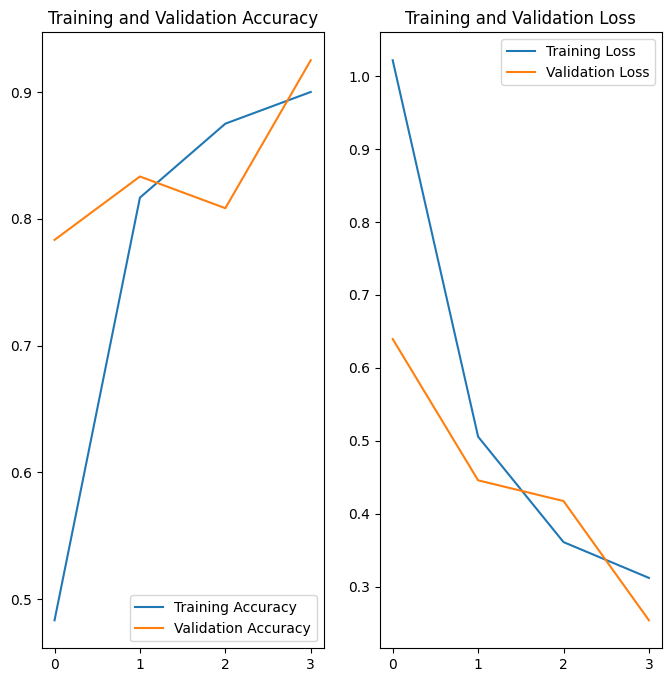

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle=True,
    image_size=(224,224),
    batch_size=BATCH_SIZE
)

Found 120 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 2s 2s/step


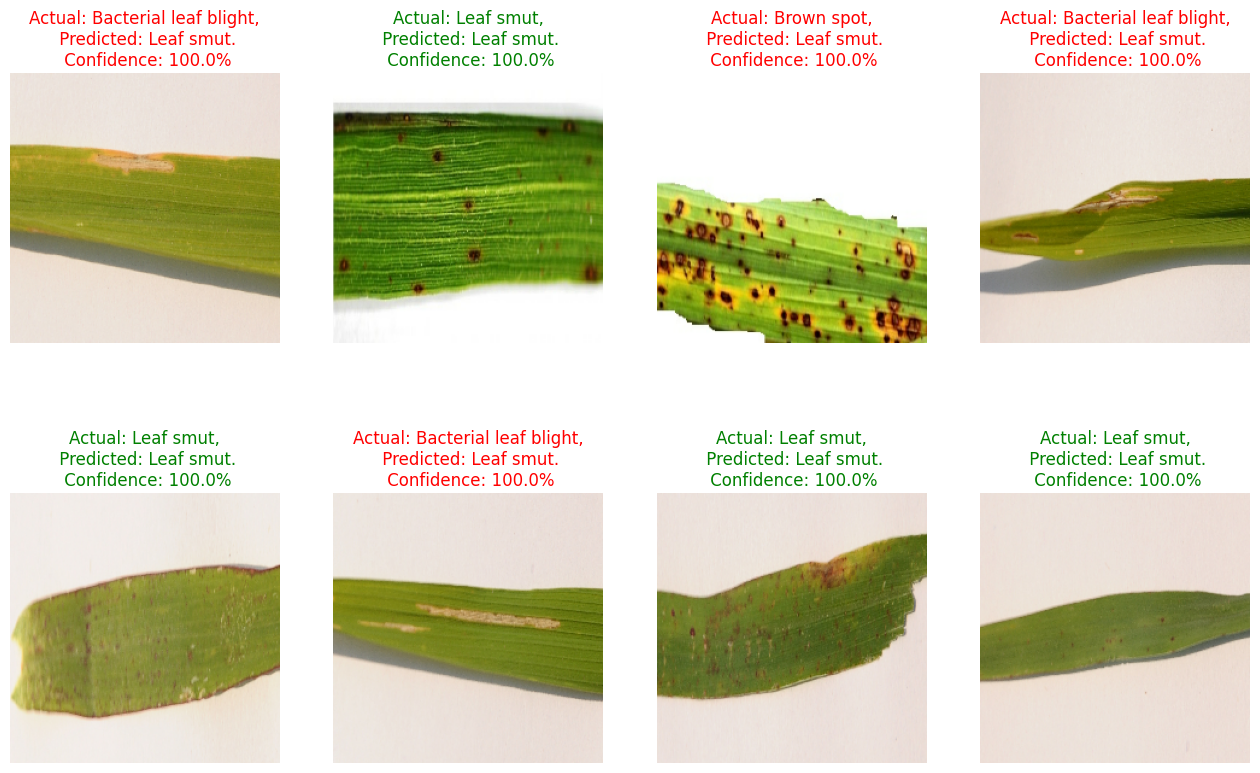

In [ ]:
import numpy as np

plt.figure(figsize=(16, 10))
for image_batch, label_batch in dataset.take(1):

    prediction_batch = model.predict(image_batch)   # contains array of size len(class_names) with confidence

    for i in range(BATCH_SIZE):

        image = image_batch[i].numpy().astype("uint8")   # converting float to int

        actual_class    = class_names[label_batch[i]]
        predicted_class = class_names[np.argmax(prediction_batch[i])]
        confidence      = round(100 * (np.max(prediction_batch[i])), 2)

        ax = plt.subplot(BATCH_SIZE//4, 4, i + 1)   # row, col, idx
        plt.imshow(image)
        title = plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.setp(title, color= 'g' if actual_class == predicted_class else 'r')
        plt.axis("off")